# Dealing with unclean data

We're going to look at data that may require some cleansing.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Read the admissions data that is not so clean

In [ ]:
data_location  = 'https://elephantscale-public.s3.amazonaws.com/data/college-admissions/admission-data-dirty.csv'

admissions = pd.read_csv(data_location)
print("admissions size : ", admissions.size)
admissions

## Get Summary
See what we get.  It will skip null values

In [ ]:
## TODO : use 'describe' functions 
admissions.describe()

In [ ]:
## TODO : make describe include all columns
admissions.describe(include = 'all')

In [ ]:
## TODO : Describe more than one column : gre and gpa
## Hint : add 'gpa' column
admissions[['gre', 'gpa']].describe()

## Drop all null values

In [ ]:
print("raw data size : ", admissions.size)

## TODO : use 'dropna' function
dropped_na = admissions.dropna()
print()
print("after drop size : ", dropped_na.size)
dropped_na


In [ ]:
# only drop nulls from admit & gre column
print("raw data size : ", admissions.size)

print()

dropped2 = admissions.dropna(subset=['admit', 'gre'])
print("after drop size : ", dropped2.size)
dropped2

## Fill in the values

In [ ]:
## TODO :  fill every thing with zero
## Hint : use 'fillna'
zero_fill = admissions.fillna(0)
zero_fill

In [ ]:
# or we can specify per column default value
## TODO : specify different default values per column
##        default value for gre = -100
fill2 = admissions.fillna({'admit': -1, 'gre': -100, 'gpa':-1, 'rank':10})
fill2

## Replace values

In [ ]:
print (admissions)

admissions2 = admissions.copy(deep=True)

## TODO : use replace to change 800 to 1000
## Hint : replace (800, 1000)
admissions2['gre'].replace(800, 1000, inplace=True)

print()
print (admissions2)

## Clean out RANK column

In [ ]:
## TODO : filter out any thing other than 1,2,3,4  in rank column
a = admissions[admissions['rank'].isin(['1','2','3','4'])]
a

#Exercise 2  - Cleaning up House Sales Data (★★☆)

##Read the house-sales-simplified.csv.
> *See the shape , describe, info functions of dataframe*

> *Find Numerical and Categorical columns in the data*

In [ ]:
data_file_path  = 'https://elephantscale-public.s3.amazonaws.com/data/house-prices/house-sales-simplified.csv'
df_house = pd.read_csv(data_file_path)

#print ( "\nHouse DataFrame size: {0}\n".format(df_house.size))
print ( "\nHouse DataFrame shape: {0}\n".format(df_house.shape))
##print ( "\nHouse DataFrame info: {0}\n".format(df_house.info()))
pd.set_option('display.float_format', lambda x: '%.5f' % x)

numerical_Columns = df_house.select_dtypes([np.number]).columns.tolist()
categorical_Columns = df_house.select_dtypes( exclude = [np.number] ).columns.tolist()

numerical_Columns.remove('ID')
numerical_Columns.remove('YrBuilt')
numerical_Columns.remove('Bedrooms')

categorical_Columns.insert(0,'Bedrooms')
categorical_Columns.remove("Date")
print ("\nnumerical_Columns: {0} \ncategorical_Columns: {1} \n".format(numerical_Columns,categorical_Columns  ) )
df_house.describe(include='all')


 Distribution of all numerical values 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d8e5be908>,
      dtype=object)

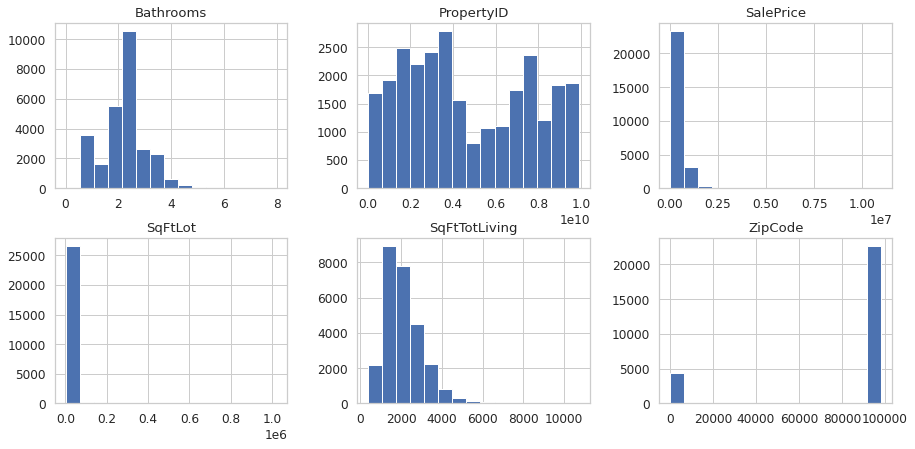

In [197]:
## see the frequency of all numerical columns and outliers

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

## distribution of all numerica columns
##df_house[numerical_Columns].hist(bins=10, figsize=(10, 5), layout=(3, 3))
print ( "\n Distribution of all numerical values \n")
df_house[numerical_Columns].hist(bins=15, figsize=(15, 7), layout=(2, 3))


Distribution of categorical values 



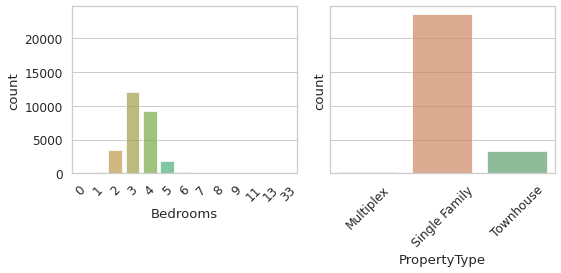

In [237]:
print ( "\nDistribution of categorical values \n")
## distribution of categorical columns
listsize = len( categorical_Columns)
ncol = 3
if (  listsize < ncol ):
  ncol = listsize
nrow = round(len(categorical_Columns)/ ncol )

fig, axes_types = plt.subplots(nrows= nrow , ncols= ncol, sharex=False, sharey=True, squeeze=True, figsize=(8,4))

'''
for variable, subplot in zip(categorical_Columns, ax.flatten()):
      sns.countplot(df_house[variable], ax=subplot)
      for label in subplot.get_xticklabels():
        label.set_rotation(45)
'''

for i, ax in enumerate(fig.axes):
    if i <  listsize:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        xlabel = categorical_Columns[i]
        sns.countplot(x= df_house[xlabel] , alpha=0.7, data=df_house, ax=ax)

fig.tight_layout()


Distribution of SalePrice by categorical values 



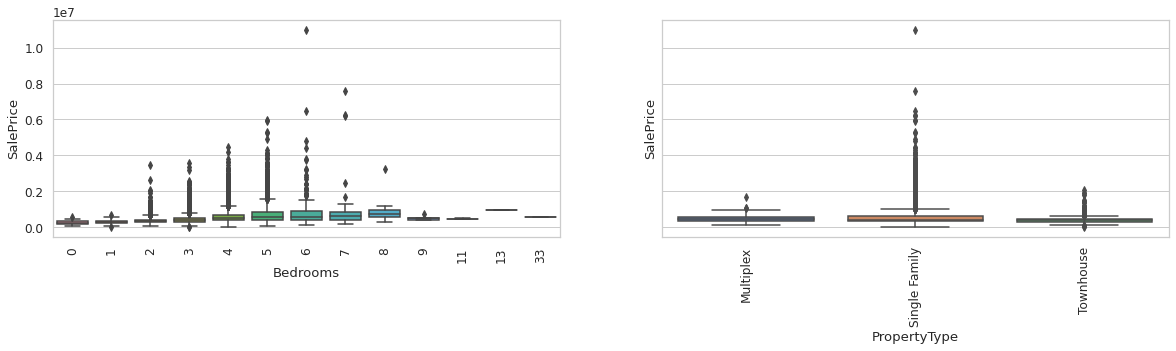

In [238]:
print ( "\nDistribution of SalePrice by categorical values \n")
## distribution of categorical columns
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, squeeze=True, figsize=(20,4))

for variable, subplot in zip(categorical_Columns, ax.flatten()):
      sns.boxplot(x=variable, y='SalePrice', data=df_house, ax=subplot)
      for label in subplot.get_xticklabels():
        label.set_rotation(90)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'ZipCode')]

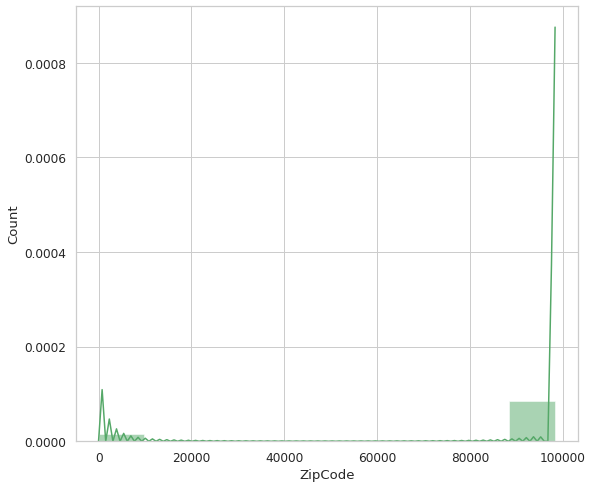

In [223]:
## Identify columns that need data cleanup
## Hint : Zipcode
plt.figure(figsize=(9, 8))
sns.distplot(
    df_house.ZipCode , bins= 10, color='g',norm_hist=True, kde=True, hist_kws={"alpha": 0.5}
).set(xlabel='ZipCode', ylabel='Count')



    ZipCode  ZipCode_Cnt
0        -1         4374
1      9800            1
2     89118            1
3     98001          358
4     98002          180
..      ...          ...
78    98198          225
79    98199          393
80    98224            3
81    98288            4
82    98354            9

[83 rows x 2 columns]


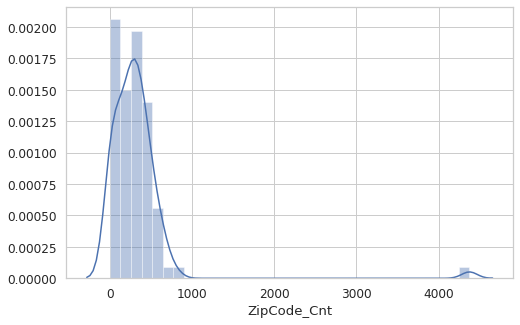

In [224]:
df_count_by_ZipCode = df_house.groupby(['ZipCode']).agg(
        ZipCode_Cnt = pd.NamedAgg(column='ZipCode', aggfunc='count')
    ).reset_index()

print( df_count_by_ZipCode)
sns.distplot(df_count_by_ZipCode.ZipCode_Cnt)


In [211]:


df_count_by_ZipCode.describe(include='all')

##sns.boxplot(data=df_house['ZipCode'])

,ZipCode,ZipCode_Cnt
count,83.00000,83.00000
mean,95730.39759,326.06024
std,14413.62531,488.30876
min,-1.00000,1.00000
25%,98029.50000,116.50000
50%,98059.00000,287.00000
75%,98117.50000,405.50000
max,98354.00000,4374.00000
